In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

<h3>We're going to investigate this dataset on physicochemical properties and quality ratings of red and white wine samples</h3>
<h4>goal of the project:to know what are the features associated with high quality wine<h4>

<h2>Table of Contents</h2>
<ul>
    <li><a href="#ref1">correlation between chemical features of wine and quality</a></li>
    <li><a href="#ref2">correlation between type of wine and quality</a></li>
    <li><a href="#ref3">Findings and summary</a></li>

</ul>


In [2]:
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'})

In [3]:
pd.set_option('display.max_columns', 1000, 'display.width', 1000)

# Importing data

In [4]:
df_red = pd.read_csv("winequality-red.csv",delimiter=';')


In [5]:
df_white = pd.read_csv("winequality-white.csv",delimiter=';')

In [6]:
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Data  wrangling and cleaning

In [8]:
df_red.rename(columns=lambda x:x.replace('-','_'),inplace=True)

In [9]:
df_red['color']='red'
df_white['color']='white'

In [10]:
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [11]:
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [12]:
df=pd.concat([df_red,df_white],axis=0,sort=False)

In [13]:
df.sample(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
1030,7.1,0.20,0.41,2.10,0.054,24.0,166.0,0.99480,3.48,0.62,10.5,6,white
109,6.9,0.33,0.28,1.30,0.051,37.0,187.0,0.99270,3.27,0.60,10.3,5,white
2049,6.3,0.28,0.24,8.45,0.031,32.0,172.0,0.99580,3.39,0.57,9.7,7,white
213,6.7,0.13,0.29,5.30,0.051,31.0,122.0,0.99440,3.44,0.37,9.7,6,white
2599,6.9,0.32,0.27,16.00,0.034,58.0,185.0,0.99938,3.34,0.60,9.0,6,white
278,10.3,0.32,0.45,6.40,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8,red
1029,7.7,0.58,0.01,1.80,0.088,12.0,18.0,0.99568,3.32,0.56,10.5,7,red
3093,7.0,0.25,0.45,2.30,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7,white
620,8.3,0.54,0.24,3.40,0.076,16.0,112.0,0.99760,3.27,0.61,9.4,5,red
3825,6.7,0.46,0.21,4.00,0.034,12.0,88.0,0.99016,3.26,0.54,13.0,6,white


In [14]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [15]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [16]:
df.duplicated().sum()

1177

no need to drop the duplicated values

In [17]:
df.describe(include='all')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4898
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,NaN
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,NaN
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,NaN
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,NaN
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,NaN


In [18]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


# Exploratory data analysis

<h2 id="ref1" style="color:blue">correlation between chemical features of wine and quality</h2>


In [19]:
df.corrwith(df['quality']).sort_values()

density                -0.305858
volatile_acidity       -0.265699
chlorides              -0.200666
fixed_acidity          -0.076743
total_sulfur_dioxide   -0.041385
residual_sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free_sulfur_dioxide     0.055463
citric_acid             0.085532
alcohol                 0.444319
quality                 1.000000
dtype: float64

### there is a low positive corrleation between alcohol percentage and quality
### there is a low negative corrleation between density and quality
### there is a low  to negligible negative corrleation between volatile_acidity and quality

In [20]:
def scatter(feature):
    fig,ax=plt.subplots(figsize=(10,5))
    sns.regplot(data=df,x='quality',y=feature,ax=ax)

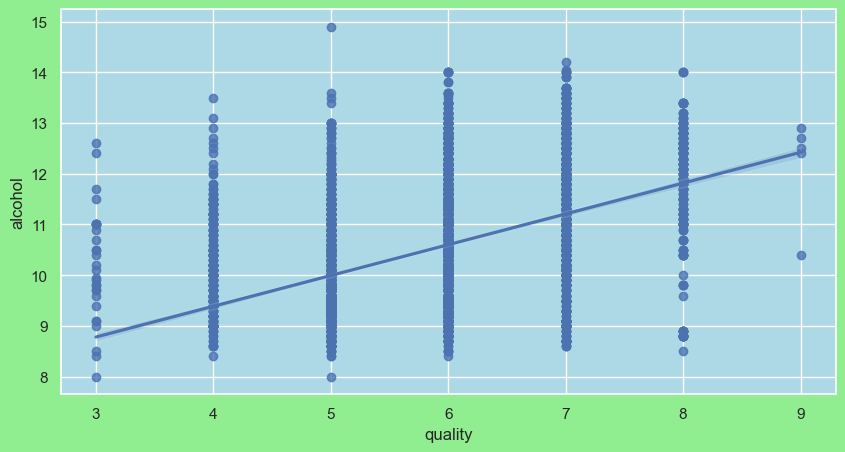

In [21]:
scatter('alcohol')

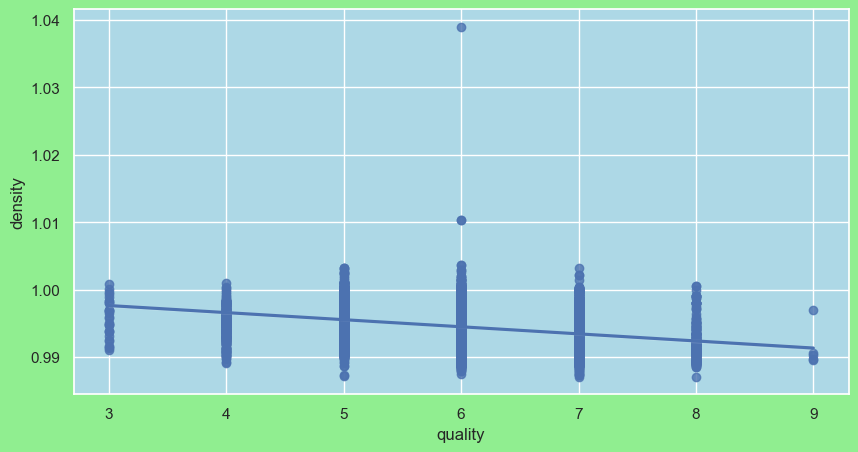

In [22]:
  scatter('density')

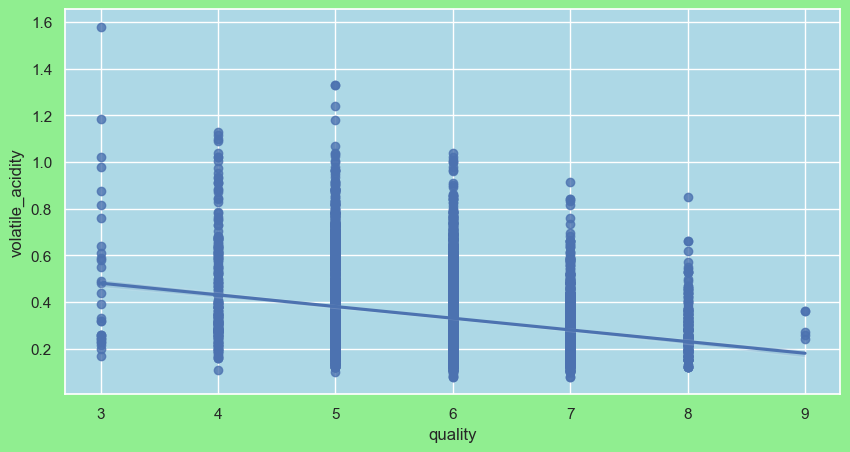

In [23]:
scatter('volatile_acidity')

<h2 id="ref2" style="color:blue">correlation between type of wine and quality</h2>

### ANOVA

In [24]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [25]:
df1=df[['color','quality']].groupby('color')

In [26]:
red_quality=df1.get_group('red')['quality']

In [27]:
white_quality=df1.get_group('white')['quality']

In [28]:
f_val, p_val = f_oneway(red_quality,white_quality)  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 93.81180728653631 , P = 4.888069044194755e-22


a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance.

In [29]:
red_avg=df_red['quality'].mean()
white_avg= df_white['quality'].mean()
print(f'red wine average quality is {round(red_avg,2)} white wine average quality is {round(white_avg,2)}')

red wine average quality is 5.64 white wine average quality is 5.88


In [30]:
df_2= df.groupby('color',as_index=False)['quality'].value_counts()

In [31]:
reds=df.groupby('color')['quality'].count()['red']
whites=df.groupby('color')['quality'].count()['white']

In [32]:
df_2

,color,quality,count
0,red,5,681
1,red,6,638
2,red,7,199
3,red,4,53
4,red,8,18
5,red,3,10
6,white,6,2198
7,white,5,1457
8,white,7,880
9,white,8,175


In [33]:
df_2['proportions']=np.where(df_2['color']=='red',df_2['count']/reds,
                    np.where(df_2['color']=='white',df_2['count']/whites,df_2['count']))

In [34]:
df_2

,color,quality,count,proportions
0,red,5,681,0.425891
1,red,6,638,0.398999
2,red,7,199,0.124453
3,red,4,53,0.033146
4,red,8,18,0.011257
5,red,3,10,0.006254
6,white,6,2198,0.448755
7,white,5,1457,0.297468
8,white,7,880,0.179665
9,white,8,175,0.035729


In [35]:
palette = ['tab:red', 'tab:blue']

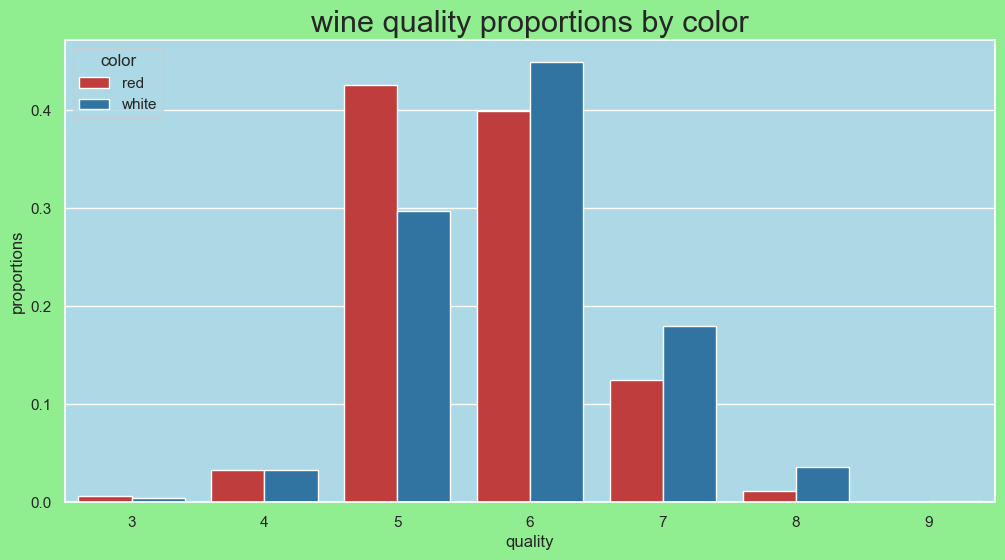

In [36]:
fig,ax=plt.subplots(figsize=(12, 6))
sns.barplot(data=df_2,x='quality',y='proportions',hue='color',palette=palette)
plt.title('wine quality proportions by color',size=22)
plt.show()

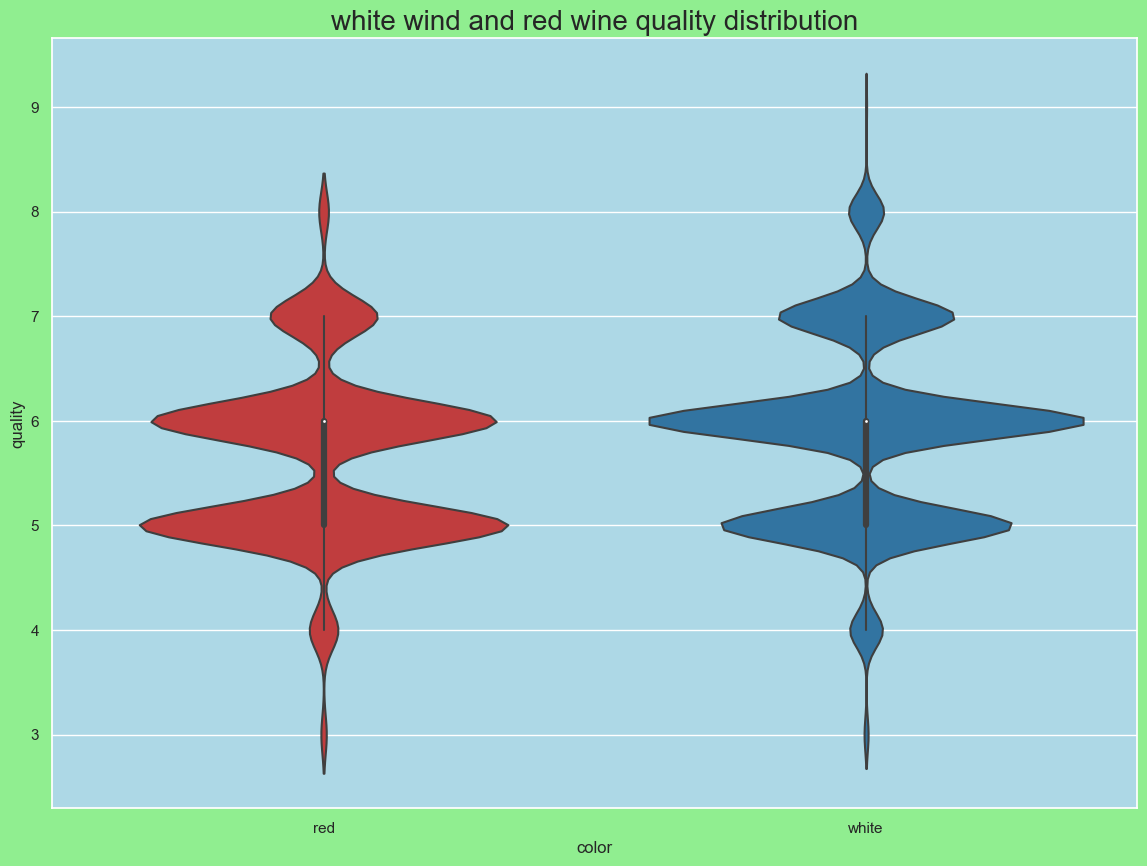

In [37]:
fig,ax=plt.subplots(figsize=(14, 10))
sns.violinplot(data=df,x='color',y='quality',ax=ax,palette=palette)
plt.title('white wind and red wine quality distribution',size=20)
plt.show()

### the white wine gets higher quality ratings than the red wine

<h1 id="ref3" style="color:blue">Findings and summary</h1>
<h3>there is a low positive corrleation between alcohol percentage and quality</h3>
<h3>there is a low negative corrleation between density and quality</h3>
<h3>there is a low  to negligible negative corrleation between volatile_acidity and quality</h3>
<h3>the white wine gets higher quality ratings than the red wine</h3>